Linear Regression Results:
 - Mean Squared Error: 7852574.20381778
 - R-squared: 0.9005298423323502


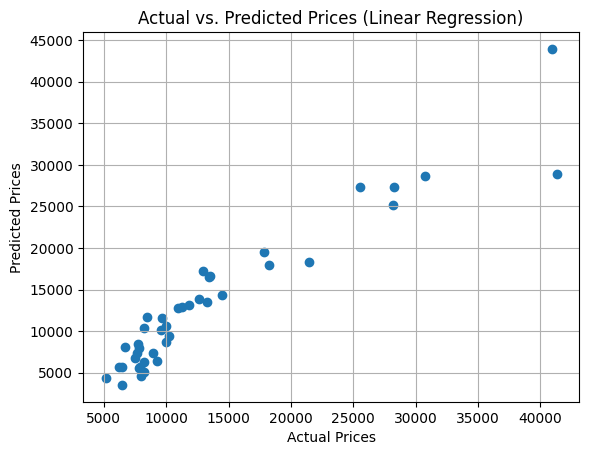

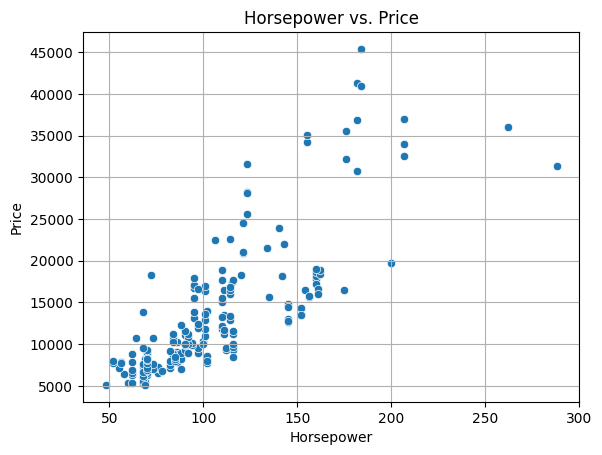

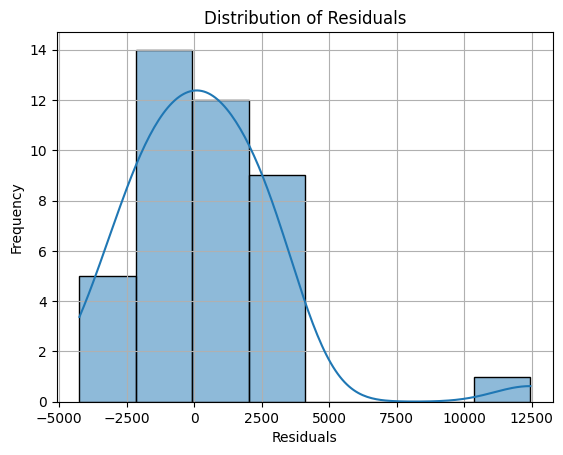

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 230838944.0000
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 235802016.0000  
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 215150448.0000  
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 244380288.0000 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 227197232.0000 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 243923760.0000 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 232041360.0000 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 217905760.0000 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 224858432.0000 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 242647968.0000  
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 228596240.0000 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 234980656.0000 
Epoch 13/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 231843920.0000 
Epoch 14/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss:

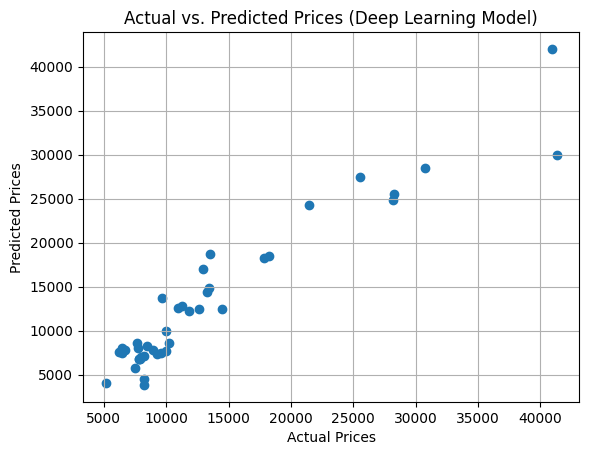

In [2]:
"""
Car Price Prediction using Machine Learning (Linear Regression)
and Deep Learning (Neural Network)

This script loads and preprocesses a car price dataset,
then trains and evaluates two models:
1. Linear Regression (traditional ML approach)
2. Deep Learning Neural Network (non-linear modeling)

Performance is compared using Mean Squared Error (MSE)
and R-squared (R²) metrics, with visualizations for insights.
"""

# -------------------- #
# 1. IMPORT LIBRARIES   #
# -------------------- #

# Data processing
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Deep learning tools
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# -------------------- #
# 2. DATA LOADING       #
# -------------------- #

# Load dataset
carData = pd.read_csv('CarPrice.csv')

# Drop the CarName column (non-numerical and irrelevant to model)
carData = carData.drop('CarName', axis=1)


# -------------------- #
# 3. DATA PREPROCESSING #
# -------------------- #

# Convert categorical variables into numerical format via one-hot encoding
# drop_first=True prevents multicollinearity by dropping one dummy variable per category
categorical_cols = [
    'fueltype', 'aspiration', 'doornumber', 'carbody',
    'drivewheel', 'enginelocation', 'enginetype',
    'cylindernumber', 'fuelsystem'
]
carData = pd.get_dummies(carData, columns=categorical_cols, drop_first=True)

# Separate features (X) and target variable (y)
X = carData.drop('price', axis=1)
y = carData['price']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# -------------------- #
# 4. FEATURE SCALING    #
# -------------------- #

# Standardize features for better model convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on train set, transform
X_test = scaler.transform(X_test)        # Transform test set using same fit


# -------------------- #
# 5. LINEAR REGRESSION  #
# -------------------- #

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print(" - Mean Squared Error:", mse)
print(" - R-squared:", r2)

# Visualization: Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (Linear Regression)")
plt.grid(True)
plt.show()

# Visualization: Horsepower vs Price
sns.scatterplot(x='horsepower', y='price', data=carData)
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.title("Horsepower vs. Price")
plt.grid(True)
plt.show()

# Visualization: Residual distribution
sns.histplot(y_test - y_pred, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.grid(True)
plt.show()


# -------------------- #
# 6. DEEP LEARNING MODEL#
# -------------------- #

# Build a simple feedforward neural network
dl_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input + first hidden layer
    Dropout(0.2),  # Prevent overfitting
    Dense(64, activation='relu'),  # Second hidden layer
    Dropout(0.2),
    Dense(32, activation='relu'),  # Third hidden layer
    Dense(1)  # Output layer (regression -> 1 neuron, no activation)
])

# Compile model with Adam optimizer and MSE loss
dl_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model (100 epochs, batch size of 32)
dl_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Predictions from DL model
y_dl_model = dl_model.predict(X_test).flatten()  # Flatten to 1D array

# Evaluate performance
mse_dl_model = mean_squared_error(y_test, y_dl_model)
r2_dl_model = r2_score(y_test, y_dl_model)

print("\nDeep Learning Model Results:")
print(" - Mean Squared Error:", mse_dl_model)
print(" - R-squared:", r2_dl_model)

# Visualization: Actual vs Predicted for DL model
plt.scatter(y_test, y_dl_model)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (Deep Learning Model)")
plt.grid(True)
plt.show()
